# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# Remove the column Unnamed:0

df=df.drop(['Unnamed: 0'],axis=1)
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
df.tail(10)

,TV,radio,newspaper,sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.sample(5)

,TV,radio,newspaper,sales
135,48.3,47.0,8.5,11.6
110,225.8,8.2,56.5,13.4
94,107.4,14.0,10.9,11.5
105,137.9,46.4,59.0,19.2
198,283.6,42.0,66.2,25.5


In [10]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
df.isnull().sum() # No null valuse present in the data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

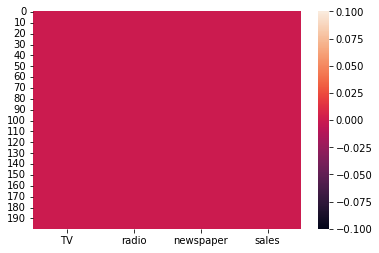

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


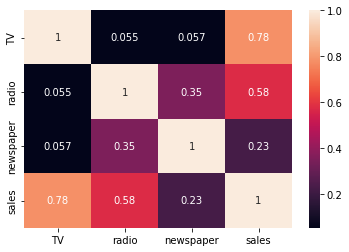

In [14]:
sns.heatmap(df.corr(),annot=True)

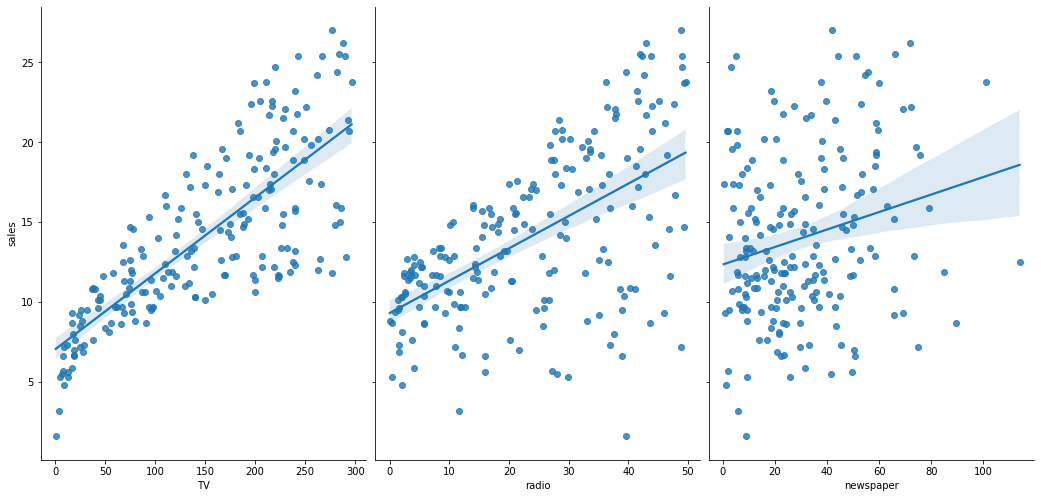

In [15]:
sns.pairplot(df,x_vars=df.columns[:3],y_vars=df.columns[3:],size=7,aspect=0.7,kind='reg')

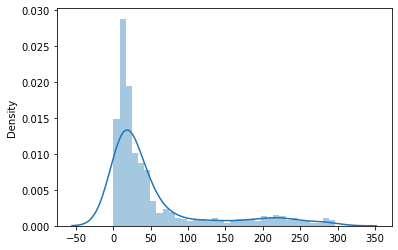

In [16]:
sns.distplot(df)

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

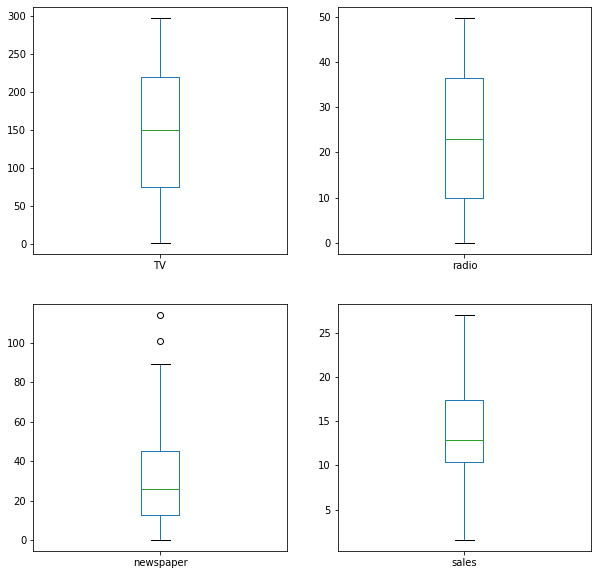

In [17]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,10))  #Outlier is present in News paper

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280A3C37948>,
      dtype=object)

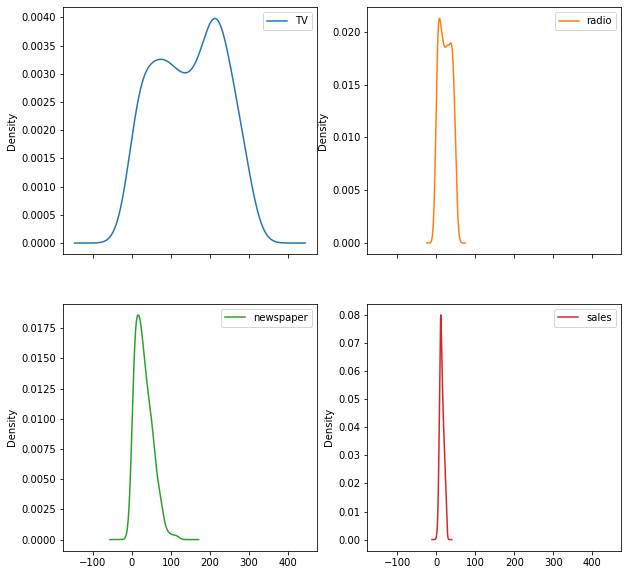

In [18]:
df.plot(kind='kde',subplots=True, layout=(2,2),figsize=(10,10))

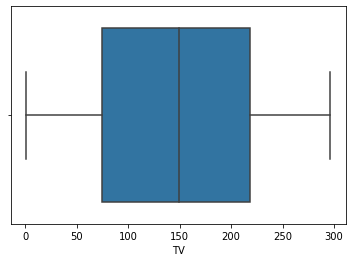

In [19]:
sns.boxplot(df['TV'])

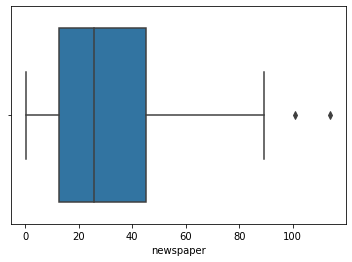

In [20]:
sns.boxplot(df['newspaper'])

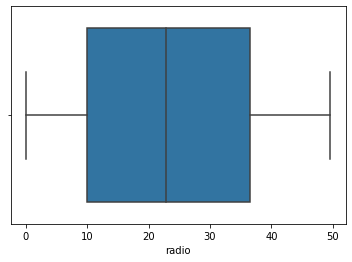

In [23]:
sns.boxplot(df['radio'])

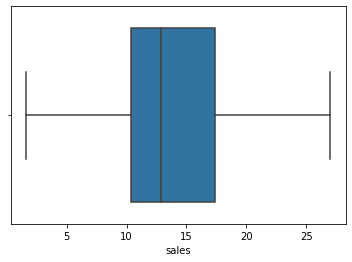

In [22]:
sns.boxplot(df['sales'])

### Skewnes

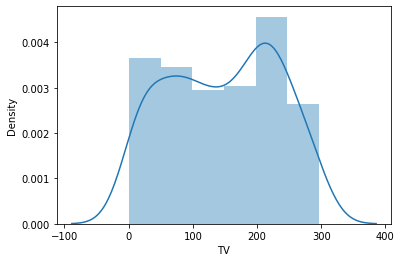

In [25]:
sns.distplot(df['TV'])

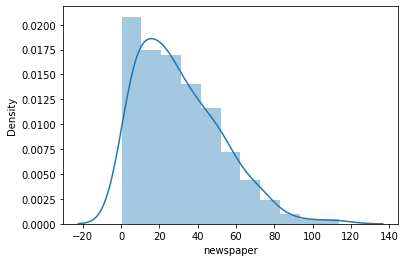

In [28]:
sns.distplot(df['newspaper'])

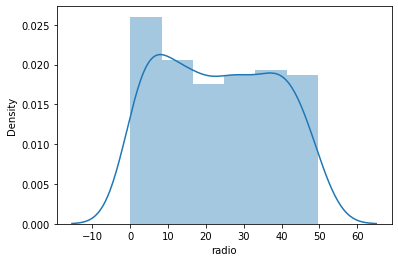

In [29]:
sns.distplot(df['radio'])

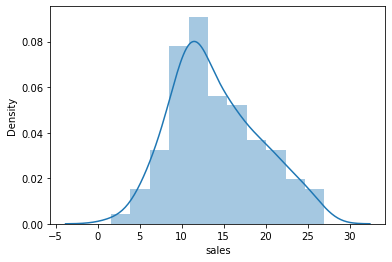

In [30]:
sns.distplot(df['sales'])

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [254]:
skewed=np.log(df)
print(skewed)

           TV     radio  newspaper     sales
0    5.438514  3.632309   4.237001  3.095578
1    3.795489  3.671225   3.808882  2.341806
2    2.844909  3.826465   4.238445  2.230014
3    5.020586  3.720862   4.069027  2.917771
4    5.197391  2.379546   4.067316  2.557227
..        ...       ...        ...       ...
195  3.642836  1.308333   2.624669  2.028148
196  4.545420  1.589235   2.091864  2.272126
197  5.176150  2.230014   1.856298  2.549445
198  5.647565  3.737670   4.192680  3.238678
199  5.447168  2.151762   2.163323  2.595255

[200 rows x 4 columns]


In [256]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'A_Boxcox', 
              boxcox(df.iloc[:, 0])[0])

# Removing Outliers

In [40]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [41]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [45]:
df_new=df[(z<3).all(axis=1)]  # Outliers is removed
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

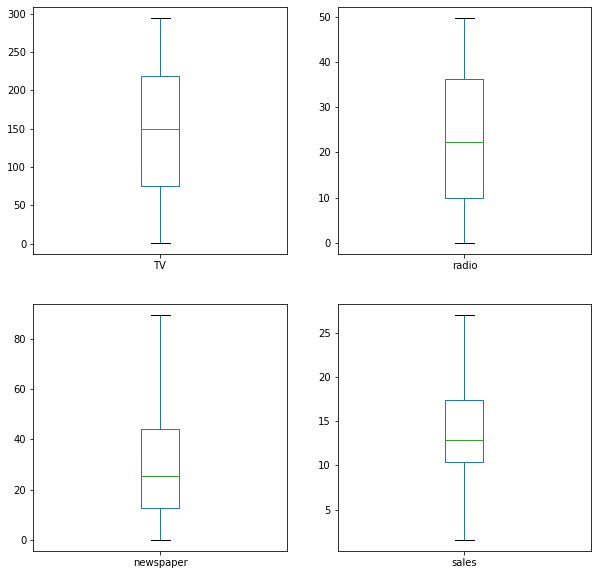

In [47]:
df_new.plot(kind='box',subplots=True, layout=(2,2),figsize=(10,10)) #No Outlier is present

In [87]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,3:]

## Standard Scaler

In [88]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 0.97869734  0.98952135  1.93299778]
 [-1.19901165  1.09070498  0.75131275]
 [-1.51933199  1.53591293  1.93790103]
 [ 0.05645636  1.22561648  1.40834924]
 [ 0.40024339 -0.83178391  1.40344598]
 [-1.61906543  1.73828018  2.2173867 ]
 [-1.04647815  0.6522426  -0.30779084]
 [-0.31079737 -0.23817331 -0.89127846]
 [-1.62023876 -1.41864895 -1.41102374]
 [ 0.62317696 -1.38492107 -0.42056576]
 [-0.94557138 -1.16906267 -0.27346804]
 [ 0.79800381  0.05863199 -1.26392602]
 [-1.44189191  0.80739083  1.77119028]
 [-0.57714432 -1.04764232 -1.10702179]
 [ 0.67363035  0.65898817  0.79544207]
 [ 0.57155024  1.65733328  1.13376683]
 [ 1.58061798  1.1109417   1.27596129]
 [-0.90919801 -0.17746313 -0.56276022]
 [ 0.0071763   0.05188642 -0.52353416]
 [ 0.84141719  0.30821827  1.15828311]
 [ 1.06435076 -1.21628169 -0.30779084]
 [-1.56626537 -0.48775959  0.97195933]
 [ 0.95757732 -0.42030384 -0.17540289]
 [-0.99015809 -0.71036356 -0.56276022]
 [ 1.36355108 -1.32421089 -0.50392113]
 [-0.04445042  0.41614747

## Variance Inflation Factor

In [89]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif


,VIF,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


# Training and Testing data

In [90]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.30,random_state=42)

In [91]:
train_x.shape

(138, 3)

In [92]:
test_x.shape

(60, 3)

In [93]:
train_y.shape

(138, 1)

In [94]:
test_y.shape

(60, 1)

# Model Building

# Linear Regession

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [96]:
lr_pred=lr.predict(test_x)
print(lr_pred)

[[ 8.69976099]
 [11.92478365]
 [23.34452286]
 [ 8.91262445]
 [10.66098008]
 [21.64204703]
 [19.20466511]
 [11.49656131]
 [13.96885459]
 [17.46403623]
 [14.18084249]
 [20.95846023]
 [ 8.79117747]
 [12.57315945]
 [ 6.48664407]
 [ 9.03899894]
 [10.92809601]
 [12.41486027]
 [ 9.75771188]
 [11.42036281]
 [13.24262188]
 [16.91308427]
 [23.00365635]
 [ 6.10877469]
 [16.96892644]
 [20.8681456 ]
 [ 8.24584568]
 [14.96662991]
 [ 6.84420106]
 [12.23984571]
 [17.78050738]
 [13.55425068]
 [ 6.43359072]
 [14.46490719]
 [15.37562927]
 [17.96797551]
 [15.15223764]
 [11.72937091]
 [18.30530225]
 [16.03851708]
 [19.10094652]
 [13.13968559]
 [11.75914391]
 [ 9.31356067]
 [ 6.27198868]
 [ 7.53772187]
 [17.07009432]
 [16.0295965 ]
 [11.14768266]
 [22.78854017]
 [16.79749391]
 [13.87100612]
 [18.54701824]
 [ 5.30200408]
 [ 4.52980725]
 [12.27690164]
 [ 9.63850925]
 [21.60559042]
 [13.81774223]
 [10.7446352 ]]


In [97]:
lr.coef_

array([[3.80578513, 2.73285341, 0.27410155]])

In [98]:
lr.intercept_

array([13.94324666])

In [99]:
lr.score(test_x,lr_pred)

1.0

In [156]:
accuracy=lr.score(train_x,train_y)
accuracy

0.8949751177619989

We got 89% accuracy in training data

In [162]:
accuracy=lr.score(test_x,test_y)
print(accuracy)

0.8851774936997314


We got 88% accuracy in Testing data

# Using Lasso and Ridge Method

In [234]:
## Using Lasso Method
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(train_x,train_y)

Lasso(alpha=0.001)

In [238]:
print("The score in Lasso:",ls.score(train_x,train_y))

The score in Lasso: 0.8949750377678837


In [239]:
rg=Ridge(alpha=0.01)
rg.fit(train_x,train_y)

Ridge(alpha=0.01)

In [241]:
print("The score in Ridge:",rg.score(train_x,train_y))

The score in Ridge: 0.8949751133248549


In [245]:
print("Lasso Coefficient:",ls.coef_)
print("Ridge Coefficient:",rg.coef_)

Lasso Coefficient: [3.80487802 2.73220702 0.27348649]
Ridge Coefficient: [[3.80550669 2.73263539 0.27419449]]


In [246]:
print("Lasso Intercept:",ls.intercept_)
print("Ridge Intercept:",rg.intercept_)

Lasso Intercept: [13.94331613]
Ridge Intercept: [13.9432546]


## KMeans Clustering

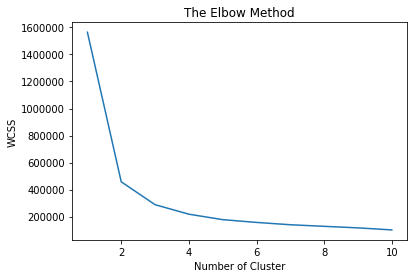

In [103]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [104]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[0 1 1 2 2 1 1 2 1 0 1 0 1 2 0 0 0 1 2 0 0 1 0 1 0 2 0 0 1 0 2 2 0 2 0 0 1
 1 0 0 2 0 0 1 2 1 0 0 1 0 2 0 2 0 0 1 2 0 0 1 0 0 2 2 1 1 2 0 0 0 2 1 2 0
 1 1 2 1 2 1 0 1 1 0 0 1 2 1 2 2 1 0 0 2 2 0 2 0 2 0 0 2 0 2 1 1 1 0 0 0 2
 0 1 1 2 1 2 1 2 1 0 2 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 2 1 0 0 2 2 2 0 0 1 1
 0 2 0 2 2 1 1 2 1 2 2 1 2 2 2 0 1 0 0 0 1 2 1 2 0 0 0 2 0 2 2 0 1 0 0 0 2
 0 0 1 1 1 1 2 2 1 2 2 0 0]


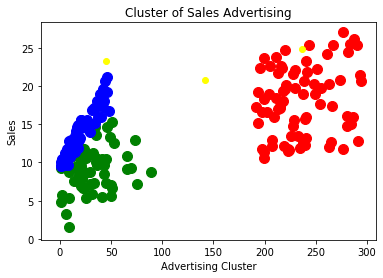

In [117]:

plt.scatter(x[y_kmeans==0]['TV'],y[y_kmeans==0]['sales'],s=100,c='red',label='TV Sales Cluster')
plt.scatter(x[y_kmeans==1]['newspaper'],y[y_kmeans==1]['sales'],s=100,c='green',label='News Paper Sales Cluster')
plt.scatter(x[y_kmeans==2]['radio'],y[y_kmeans==2]['sales'],s=100,c='blue',label='Radio Sales Cluster')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.title('Cluster of Sales Advertising')
plt.xlabel('Advertising Cluster')
plt.ylabel('Sales')
plt.show()

In [126]:
kmeans.cluster_centers_

array([[236.175     ,  24.84868421,  32.52894737],
       [ 44.85625   ,  23.221875  ,  29.76875   ],
       [141.79655172,  20.77931034,  26.18103448]])

In [251]:
from sklearn.cluster import DBSCAN
db=DBSCAN().fit(train_x,train_y)
db

DBSCAN()

In [253]:
db.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1,  1,  2, -1,  4, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1,  3,  1, -1, -1,  0, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  4, -1,  2,  0, -1, -1,  2, -1, -1,  1,  2,  3, -1, -1, -1,
       -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,  2,  2,  0,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  4, -1,  3,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1,  4, -1, -1, -1, -1, -1,  3,  0, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  2,  4, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  3, -1, -1, -1, -1,
        0, -1], dtype=int64)

# Calculating the R2 Square

In [134]:
from sklearn.metrics import r2_score
r2_score=r2_score(test_y,lr_pred)
print(r2_score*100)

88.51774936997315


R2 Score is 88%

# Using Gradient Boosting Regressor

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [136]:
gb_clf=GradientBoostingRegressor(n_estimators=100,max_depth=5)
gb_clf.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=5)

In [138]:
gb_pred=gb_clf.predict(test_x)
print(gb_pred)

[ 8.89835909 13.44312419 22.81185825  9.83996061  5.63206268 23.65741737
 19.57717612 12.60162513 15.20294686 14.77084806 14.11069374 22.57327344
  5.61123611 13.11425408  8.73689664 10.19715983  5.61498401 11.40895264
  9.64581947 11.92447384 14.01652202 17.40664518 25.31165072  7.20347264
 17.0987796  22.3239077   8.07061597 12.36389229  7.68521135 12.61709697
 18.64935962 15.03527603  8.76612469 12.74896431 12.5251196  18.6634611
 15.39493651 12.34231125 19.02288774 16.45837671 21.33603993  5.7382686
 13.50566278 10.62456505  7.55255322  7.76161262 18.62577257 16.26712282
  8.65339102 25.70746092 18.17454236 12.94420591 19.98137025  7.73862868
  7.45670418 11.46567637 11.18488654 20.58171494 14.37121583 12.69740418]


### Mean Squared Error

In [146]:
error=[mean_squared_error(test_y,gb_pred) for gb_pred in gb_clf.staged_predict(test_x)]
print(error)

[22.386626581938504, 18.34958512563344, 14.994005398984626, 12.281733179883846, 10.15576999023246, 8.341653087673217, 6.852024775395094, 5.772920740449582, 4.842348718021487, 4.028384829640342, 3.446388353927228, 2.926358179543112, 2.4808483118216462, 2.1371184158229815, 1.8562362225718205, 1.6160110322723502, 1.4202034478860637, 1.2736728829270794, 1.1538553244547716, 1.0480113461456844, 0.9575288192331951, 0.8930684716427459, 0.8310296607353224, 0.7853643694798762, 0.7508221385448905, 0.720039698420477, 0.6929143955376726, 0.6729535486663674, 0.656472226089251, 0.6417071356422868, 0.6279412775866215, 0.6166754784363263, 0.6070218653716968, 0.6002787438908493, 0.5954884442362602, 0.5911445390177466, 0.5890638397703888, 0.5865873133610052, 0.5844609376919163, 0.5808153013458823, 0.5798059137281933, 0.576720005786835, 0.5756636352511875, 0.5741063694493257, 0.57363705993742, 0.5717488604539679, 0.5698605381260273, 0.5698606376250674, 0.5692445558784389, 0.5687034367034242, 0.56816882798

In [147]:
bst_est=np.argmin(error)
bst_est

70

In [148]:
gb_bst=GradientBoostingRegressor(n_estimators=bst_est,max_depth=5)

In [149]:
gb_bst.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=5, n_estimators=70)

In [150]:
gb_bst.score(test_x,gb_pred)

0.9999269558985376

## Support Vector Regressor

In [182]:
from sklearn.svm import SVR
kernel_list=['linear','poly','rbf']
for i in kernel_list:
    svr=SVR(kernel=i)
    svr.fit(train_x,train_y)
    print(svr.score(train_x,train_y))
    pred=svr.predict(test_x)

0.8756486147239911
0.8392501138235374
0.9172905914724837


rbf Kernel gives a good score 91% in Support Vector Regressor

In [187]:
svr=SVR(kernel='rbf')
svr.fit(train_x,train_y)
print("SVR Score is:\n",svr.score(train_x,train_y),"\n")
svr_pred=svr.predict(test_x)
print("Predicted Sales value is:\n",svr_pred)

SVR Score is:
 0.9172905914724837 

Predicted Sales value is:
 [ 9.59173858 12.46766219 22.2214975  10.17086656 10.46179016 18.74973585
 20.2420673  12.09105778 15.09583599 14.87263099 14.39451088 21.56794157
  9.44402159 13.56261453  8.73803531 10.24266091 10.73684176 11.32500964
  9.90249095 11.70141439 12.95222137 17.56789676 22.71053346  8.0076006
 17.83873219 21.51428867  9.77371443 13.84381963  8.23547422 11.87208004
 18.75903134 14.45832698  8.98485329 13.60084269 12.54908405 17.54051365
 15.83578283 11.77423175 18.45334525 17.0076013  18.03537697 12.00710184
 12.69087919 10.29451859  8.27946721  8.49421248 17.70665334 16.59631123
 11.19795526 19.85160645 18.14583365 12.65036005 19.08475507  8.07216472
  7.89937686 11.82162388 10.44990549 19.66167922 13.63323059 11.97126785]


In [191]:
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
pipe=[]
pipe.append(('SC', StandardScaler()))
pipe.append(('PCA',PCA(n_components=8)))
pipe.append(('SGD',SGDRegressor(alpha=0.1,learning_rate='optimal',max_iter=200,penalty='l2')))
model=Pipeline(pipe)


In [192]:
model

Pipeline(steps=[('SC', StandardScaler()), ('PCA', PCA(n_components=8)),
                ('SGD',
                 SGDRegressor(alpha=0.1, learning_rate='optimal',
                              max_iter=200))])

# Hyper Parameter Tuning

In [210]:
from sklearn.model_selection import GridSearchCV
grid_param={
    'learning_rate':[1.0,0.5,1.0,0.1,0.001],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [221]:
grid=GridSearchCV(estimator=gb_bst,param_grid=grid_param,cv=2,n_jobs=1,verbose=3)


In [222]:
grid.fit(train_x,train_y)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.768 total time=   0.0s
[CV 2/2] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.848 total time=   0.0s
[CV 1/2] END learning_rate=1.0, max_depth=3, n_estimators=50;, score=0.764 total time=   0.0s
[CV 2/2] END learning_rate=1.0, max_depth=3, n_estimators=50;, score=0.842 total time=   0.0s
[CV 1/2] END learning_rate=1.0, max_depth=3, n_estimators=100;, score=0.764 total time=   0.0s
[CV 2/2] END learning_rate=1.0, max_depth=3, n_estimators=100;, score=0.834 total time=   0.0s
[CV 1/2] END learning_rate=1.0, max_depth=3, n_estimators=200;, score=0.764 total time=   0.0s
[CV 2/2] END learning_rate=1.0, max_depth=3, n_estimators=200;, score=0.819 total time=   0.0s
[CV 1/2] END learning_rate=1.0, max_depth=5, n_estimators=10;, score=0.823 total time=   0.0s
[CV 2/2] END learning_rate=1.0, max_depth=5, n_estimators=10;, score=0.890 total time=  

GridSearchCV(cv=2,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=70),
             n_jobs=1,
             param_grid={'learning_rate': [1.0, 0.5, 1.0, 0.1, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [223]:
best_parameter=grid.best_params_
print(best_parameter)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [224]:
grid.best_score_

0.9496165510166974

We got 94% score after tuning the parameter

## Cross Validation

In [172]:
from sklearn.model_selection import cross_val_score


In [180]:
scores=cross_val_score(lr,x,y,cv=10,scoring='neg_mean_squared_error')
accuracy= -scores  #cross_val_score give result in negative result so we negate it to get positive result
print("Linear Regression Cross Validation Score is \n",accuracy,"\n")
print("Accuracy of Mean:",accuracy.mean())
print("Accuracy of Standard Deviation:",accuracy.std())

Linear Regression Cross Validation Score is 
 [3.51214055 3.28220079 2.33677381 2.51209071 1.51932738 1.56575124
 8.16449714 1.99673917 3.20647742 2.58318161] 

Accuracy of Mean: 3.0679179811724238
Accuracy of Standard Deviation: 1.8198383331133676


In [181]:
scores=cross_val_score(gb_clf,x,y,cv=10,scoring='neg_mean_squared_error')
accuracy= -scores  #cross_val_score give result in negative result so we negate it to get positive result
print("Gradient Boosting Regressor Cross Validation Score is \n",accuracy,"\n")
print("Accuracy of Mean:",accuracy.mean())
print("Accuracy of Standard Deviation:",accuracy.std())

Gradient Boosting Regressor Cross Validation Score is 
 [0.58591359 0.47476825 0.56217569 0.72221943 0.61656757 0.60440256
 0.90327221 0.39530604 0.33860978 0.35745908] 

Accuracy of Mean: 0.5560694199140637
Accuracy of Standard Deviation: 0.1656107441075793


In [183]:
scores=cross_val_score(svr,x,y,cv=10,scoring='neg_mean_squared_error')
accuracy= -scores  #cross_val_score give result in negative result so we negate it to get positive result
print("Support Vector Regressor Cross Validation Score is \n",accuracy,"\n")
print("Accuracy of Mean:",accuracy.mean())
print("Accuracy of Standard Deviation:",accuracy.std())

Support Vector Regressor Cross Validation Score is 
 [2.9424433  4.03323716 4.35519931 1.8404768  3.60866913 1.75011864
 5.30723755 2.496505   5.66496199 5.16172679] 

Accuracy of Mean: 3.7160575680512613
Accuracy of Standard Deviation: 1.3568045411448046


# Saving the Model

In [225]:
# Saving the Model

import pickle
filename='Advertise_sales_prediction_model.pickle'
pickle.dump(gb_bst,open(filename,'wb'))

In [226]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([ 8.89297314, 13.44235817, 22.80623623,  9.87800454,  5.59172593,
       23.59299033, 19.57645197, 12.6673032 , 15.20323204, 14.77794507,
       14.11757167, 22.72546934,  5.6203369 , 13.11448976,  8.7569937 ,
       10.18605706,  5.57035735, 11.41226168,  9.66085735, 11.92577306,
       14.01060546, 17.40053038, 25.3011836 ,  7.17974193, 17.12849905,
       22.31753461,  8.14815789, 12.35677153,  7.67573711, 12.63158388,
       18.67173003, 15.05211651,  8.78693158, 12.72330261, 12.54015335,
       18.65330491, 15.38872998, 12.36510347, 19.02159087, 16.47359681,
       21.30103232,  5.6877083 , 13.4992371 , 10.67071728,  7.51751864,
        7.74123941, 18.60763175, 16.25893197,  8.65033148, 25.69728625,
       18.17782328, 12.94108492, 19.95808872,  7.93317725,  7.47279942,
       11.46025577, 11.32752992, 20.58474279, 14.36001309, 12.62438981])